### Imports

In [171]:
import pywt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from CSIKit.tools.batch_graph import *
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import pandas as pd
import seaborn as sb

### Lists of csv and pcap files

In [172]:
pcap_files = ["csi_tests_pcap/" + i for i in listdir('csi_tests_pcap')]
csv_files = ["csi_tests_csv/" + i for i in listdir('csi_tests_csv')]
pcap_files.sort(key=lambda x: (ord(x[-13])*10) + int(x[-7] + x[-6]) if x[-7].isdigit() else (ord(x[-12])*10) + int(x[-6]))
csv_files.sort(key=lambda x: (ord(x[-12])*10) + int(x[-6] + x[-5]) if x[-6].isdigit() else (ord(x[-11])*10) + int(x[-5]))

### Dict of csv file dataframes

In [173]:
dataframes = {}

for filename in csv_files:
    cur_df = pd.read_csv(filename, index_col=None, header=0)
    cur_df.columns = np.arange(0,len(cur_df.columns))
    dataframes[filename[14:]] = cur_df

### Visualization of file lengths

In [174]:
filesLen = pd.DataFrame(columns=["Name", "Length"])
idx = 0
lens = []

for filename in dataframes:
    lens.append(dataframes[filename].shape[0])
    filesLen.loc[idx] = [filename[:-7] if filename[-6].isdigit() else filename[:-6], dataframes[filename].shape[0]]
    idx = idx + 1

binsHeight, intervals = np.histogram(filesLen.Length.values, bins=50)
filesLen = filesLen.sort_values("Length")

y = []
for i in binsHeight:
    for j in range(i):
        y.append(j*0.03+0.017)

filesLen["Count"] = y

z = []
for i in range(len(intervals)-1):
    z.append((intervals[i]+intervals[i+1])/2)

x = []
for i in range(len(binsHeight)):
    for j in range(binsHeight[i]):
        x.append(z[i])

filesLen["Mid_intervals"] = x
filesLen

,Name,Length,Count,Mid_intervals
39,Hand_circle,20,0.017,24.1
40,Hand_circle,28,0.047,24.1
41,Hand_circle,59,0.017,56.9
35,Hand_circle,70,0.017,73.3
90,Hand_move_up,76,0.047,73.3
...,...,...,...,...
54,Falldown,381,0.017,384.9
8,Walking_along,394,0.017,393.1
53,Falldown,413,0.017,409.5
97,Hand_move_up,424,0.017,425.9


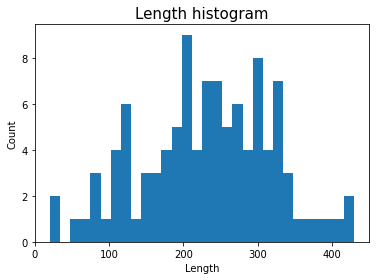

In [175]:
plt.hist(filesLen["Length"],bins=30)
plt.xlabel("Length", size = 10)
plt.ylabel("Count", size = 10)
plt.title("Length histogram", size = 15)
plt.show()

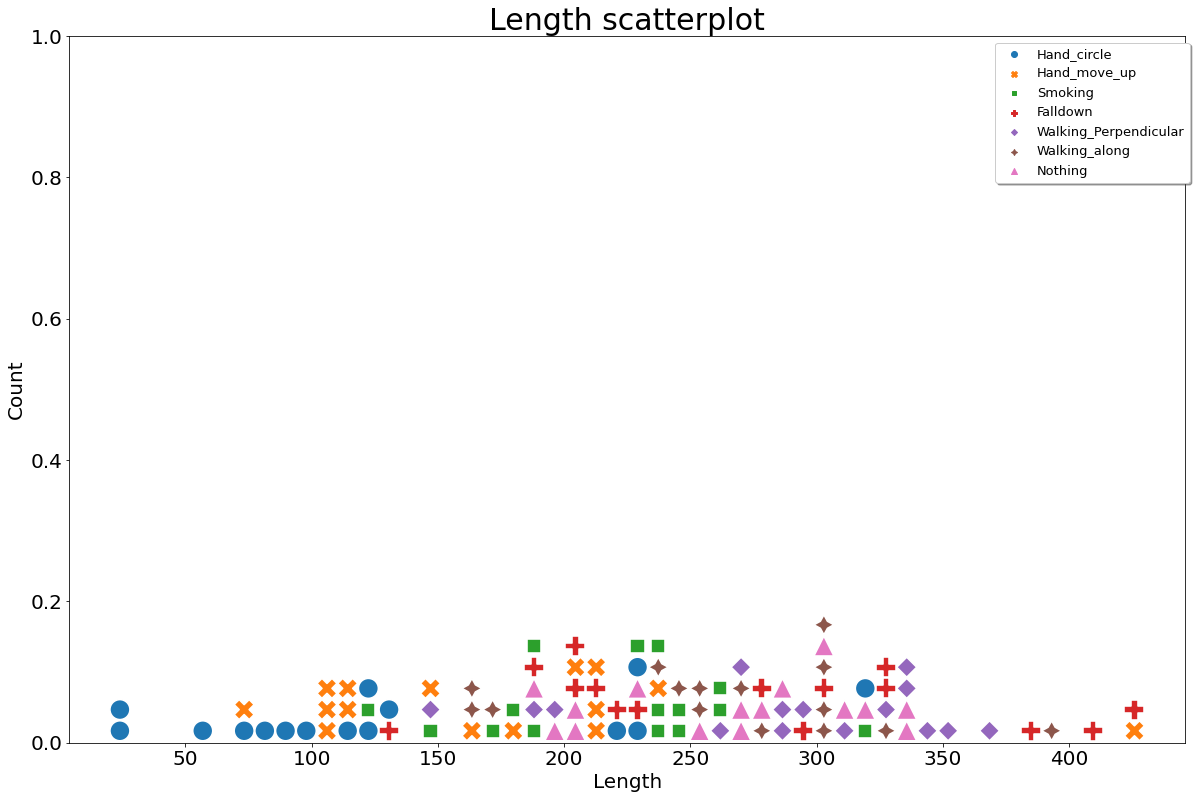

In [176]:
s = [400]*105
plt.figure(figsize=(20,13))
plt.xlabel("Length", size = 20)
plt.ylabel("Count", size = 20)
plt.title("Length scatterplot", size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)
scatter = sb.scatterplot(data=filesLen, x="Mid_intervals", y="Count", hue="Name", s=s, style="Name")

scatter.legend(fontsize = 13, bbox_to_anchor = (1.01, 1), shadow = True, )
plt.ylim((0, 1))
plt.show()

In [177]:
dataframes["Walking_along_12.csv"]

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,29.566486,42.784106,32.504200,26.830470,26.522463,30.507663,57.728056,57.215435,57.552603,57.154100,...,59.755246,59.938527,59.965484,59.639091,59.444457,34.256972,18.325089,23.443923,23.117539,30.468852
1,34.353665,42.784106,56.212895,55.861753,55.508567,55.167165,54.975267,54.828107,54.659373,54.569624,...,57.490201,57.442899,57.418840,57.361622,57.237708,57.103552,56.919554,56.859673,56.752328,41.958997
2,30.103000,42.784106,31.222159,30.141003,27.730547,22.552725,57.000501,57.377014,56.614719,56.164545,...,60.034368,59.726735,59.447767,58.884115,59.465397,29.283959,31.287223,24.668676,20.374265,13.979400
3,38.813847,42.784106,55.538855,55.428976,55.300588,55.123241,54.890580,54.614160,54.292289,53.928815,...,57.106867,57.008983,56.950226,56.941039,56.852848,56.721542,56.545664,56.378588,56.213643,29.138139
4,19.030900,42.784106,24.099331,26.821451,21.335389,32.385479,57.457655,57.307056,56.677004,56.796931,...,59.689571,59.235222,59.411441,59.189734,58.597122,22.944662,22.278867,30.795430,29.206450,24.955443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,27.267272,42.784106,58.339295,58.252183,58.136537,58.072007,58.083548,58.200759,58.183665,58.147542,...,58.728325,58.647602,58.683111,58.515482,58.529707,58.604296,58.532418,58.544287,58.425406,36.250036
163,20.863598,42.784106,25.865873,26.989700,22.944662,20.000000,57.285567,57.069779,57.003896,57.228592,...,57.883360,58.112975,57.651237,57.532835,57.659664,18.325089,28.721563,20.969100,25.987905,13.979400
164,27.611758,42.784106,11.139434,15.682017,32.944662,32.612629,59.824594,59.898221,59.569307,59.978619,...,61.109188,60.761761,60.590986,60.509958,59.993855,12.304489,31.159432,21.367206,12.552725,17.242759
165,23.873898,42.784106,24.842998,29.894498,25.987905,26.857417,60.127782,59.694853,59.441795,59.970966,...,61.164118,60.709170,60.787591,60.446565,60.752410,28.603380,24.742163,23.010300,28.773713,22.671717


### Subcarrier correlation plot

Notice:
Only "Walking_along_12.csv" will be shown here.
For full version download Visualization_all.ipynd

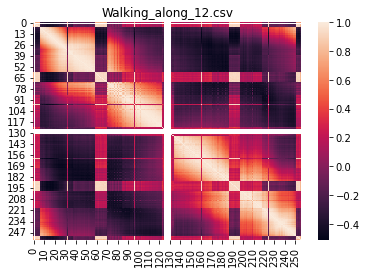

In [178]:
# for filename in dataframes:
filename = "Walking_along_12.csv"
csi_matrix = dataframes[filename]
plt.title(filename)
sb.heatmap(csi_matrix.corr())
plt.show()

### Amplitude heatmap

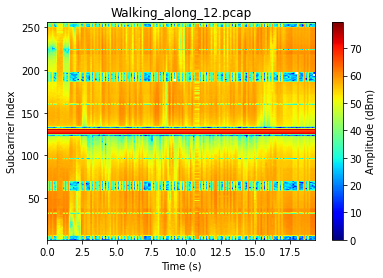

In [179]:
# for filename in pcap_files:
filename = "csi_tests_pcap/Walking_along_12.pcap"
bg = BatchGraph(filename)
bg.heatmap()

### Line plot of one subcarrier

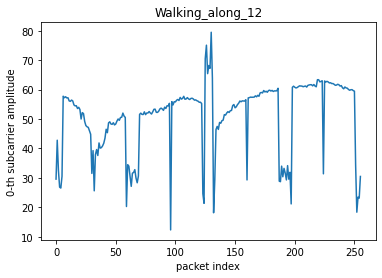

In [180]:
# for filename in dataframes:
filename = "Walking_along_12.csv"
dataframes[filename].iloc[0].plot.line()
plt.title(filename[:-4])
plt.ylabel(f"{0}-th subcarrier amplitude")
plt.xlabel("packet index")
plt.show()

### Line plot of 10 subcarriers

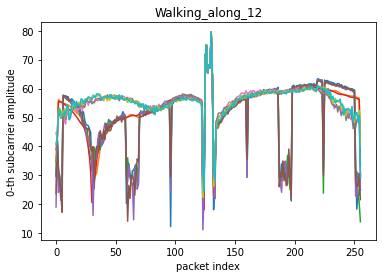

In [181]:
# for filename in dataframes:
filename = "Walking_along_12.csv"
for i in range (10):
    dataframes[filename].iloc[i].plot.line()
    plt.title(filename[:-4])
plt.ylabel(f"{0}-th subcarrier amplitude")
plt.xlabel("packet index")
plt.show()

### Line plots of 100 subcarriers

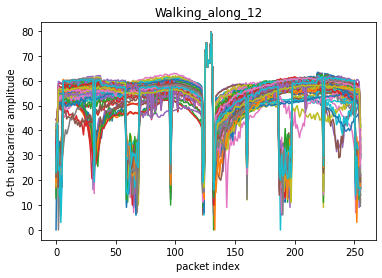

In [182]:
# for filename in dataframes:
filename = "Walking_along_12.csv"
for i in range (100):
    dataframes[filename].iloc[i].plot.line()
plt.title(filename[:-4])
plt.ylabel(f"{0}-th subcarrier amplitude")
plt.xlabel("packet index")
plt.show()

### Removing none and inf
 

In [183]:
dataframes_clean = {}
for filename in dataframes:
    cur_df = dataframes[filename]
    cur_df.replace(-np.inf, np.nan, inplace=True)
    cur_df.replace(np.nan, cur_df.mean(), inplace=True)
    dataframes_clean[filename] = cur_df

### Data normalization

In [184]:
scaler = StandardScaler()
for filename in dataframes:
    cur_df = dataframes[filename]
    cur_df = pd.DataFrame(scaler.fit_transform(cur_df), columns = cur_df.columns)
    dataframes_clean[filename] = cur_df

### PCA implementation

In [185]:
df_concat = pd.concat(dataframes_clean.values())
df_concat

pca = PCA(0.85)
pca.fit(df_concat)
pca.explained_variance_ratio_

array([0.26963106, 0.21318414, 0.16774838, 0.11044628, 0.05785691,
       0.0296289 , 0.02704428])

In [186]:
for filename in dataframes_clean:
    cur_df = dataframes_clean[filename]
    cur_df = pd.DataFrame(pca.transform(cur_df))
    dataframes_clean[filename] = cur_df
    cur_df.to_csv("csi_test_csv_clean/" + filename)

In [188]:
for filename in dataframes_clean:
    cur_df = dataframes_clean[filename]
    for column in cur_df.columns:
        print(cur_df)
        # window_size = 50
        # N = 7
        # L = 15
        # scales = [2 ** (n + (l / L)) for n in range(N) for l in range(L)]
        print(cur_df[column])
        # coef,freqs = pywt.cwt(cur_df[column],np.arange(1,),wavelet='morl')
        # sb.heatmap(coef, cmap='jet', shading='gouraud')
        # plt.show()


             0         1         2         3         4         5         6
0    -4.980784  6.571369 -6.301605 -7.108750  3.606385 -2.106243  0.045311
1    -0.464874 -2.393545 -9.735084  6.001926 -3.254839  0.107968  2.193447
2    -1.933784  8.049646 -5.390794 -5.819623  2.663716 -1.953959  0.483713
3     0.832812 -0.539516 -9.052136  6.807233 -4.252608  0.720577  1.816784
4    -0.681673  8.103399 -4.758389 -5.061274  2.423846 -1.696105  0.931313
..         ...       ...       ...       ...       ...       ...       ...
295  -2.310385 -4.371789 -4.910631  8.907648 -6.790856 -1.293484  4.320632
296  -2.598509 -5.643008 -4.429321  8.403307 -7.955694 -0.853906  3.591030
297 -13.846130  3.098548 -0.915747  2.831816 -1.366254  2.985680  1.861536
298 -13.943200  3.543597 -0.488949  2.464664 -1.154652  2.684033  1.917188
299 -11.453176  1.451613 -2.546359  0.986146  0.465036  0.100409  1.492422

[300 rows x 7 columns]
0      -4.980784
1      -0.464874
2      -1.933784
3       0.832812
4      -